In [1]:
from Pysces import *

# This work is based on the Gaussian Wavepacket Matrix Derivations by Professor Akimov.


# 1. Definition

First, the normalized gaussian wavefunction was defined:

In [44]:
alpha, gamma, x, x_0, p_0, h_b, alpha_1, alpha_2, gamma_1, gamma_2, x_1, x_2, p_1, p_2 = symbols("alpha gamma x x_0 p_0 h_b alpha_1 alpha_2 gamma_1 gamma_2 x_1 x_2 p_1 p_2")

def GAUSSIAN_NORMALIZE(alpha, gamma, x_0, p_0):
    return ((2*alpha)/pi)**(1/4) * exp(-alpha*(x - x_0)**2 + ((I*p_0)/h_b)*(x - x_0) + (I*gamma)/h_b)

GAUSSIAN_NORMALIZE(alpha_1, gamma_1, x_1, p_0)

# 2. Overlap Integral

Then, the overlap integral was defined:

In [45]:
def OVERLAP(A, B):
    return Integral(A*B, (x, -oo, oo))

We are calculating the overlap with regards to two gaussian wave packets, R and Q:

In [46]:
R = GAUSSIAN_NORMALIZE(alpha_1, gamma_1, x_1, p_1)

display(R)

Q = GAUSSIAN_NORMALIZE(alpha_2, gamma_2, x_2, p_2)

display(Q)

First, constant terms were factored out:

*Note that this is incorrect, and is missing a factored term, involving exp(). I am unsure at this time why this is.*

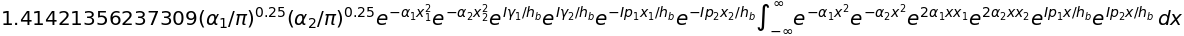

1.41421356237309*(alpha_1/pi)**0.25*(alpha_2/pi)**0.25*exp(-alpha_1*x_1**2)*exp(-alpha_2*x_2**2)*exp(I*gamma_1/h_b)*exp(I*gamma_2/h_b)*exp(-I*p_1*x_1/h_b)*exp(-I*p_2*x_2/h_b)*Integral(exp(-alpha_1*x**2)*exp(-alpha_2*x**2)*exp(2*alpha_1*x*x_1)*exp(2*alpha_2*x*x_2)*exp(I*p_1*x/h_b)*exp(I*p_2*x/h_b), (x, -oo, oo))


In [48]:
display(factor(OVERLAP(Q, R)))
print(factor(OVERLAP(Q, R)))

Please note that the numerical value is equivalent to 4^(1/4):

In [96]:
4**(1/4)

The specific term that is missing is:

Most likely this term is still within the integral. Is it possible to factor this term out? How does it affect the final answer?

In [93]:
exp(I*(alpha_2*p_1 + alpha_1*p_2)/(h_b*(alpha_1 + alpha_2)))

Continuing *without* this term leads to:

In [86]:
I = sqrt(-1)

A = ((simplify(Integral(exp(-alpha_1*x**2)*exp(-alpha_2*x**2)*exp(2*alpha_1*x*x_1)*exp(2*alpha_2*x*x_2)*exp(I*p_1*x/h_b)*exp(I*p_2*x/h_b), (x, -oo, oo)).doit())))
print(A)

Piecewise((sqrt(pi)*exp((2*alpha_1*h_b*x_1 + 2*alpha_2*h_b*x_2 + I*p_1 + I*p_2)**2/(4*alpha_1*h_b**2 + 4*alpha_2*h_b**2))/(sqrt(alpha_1)*sqrt(polar_lift(1 + alpha_2/alpha_1))), (pi/2 > Abs(arg(alpha_1) + arg((alpha_1 + alpha_2)/alpha_1))) | ((pi/2 >= Abs(arg(alpha_1) + arg((alpha_1 + alpha_2)/alpha_1))) & (pi > Abs(2*arg(alpha_1) + 2*arg(x_1) + 2*arg(1 + alpha_2*x_2/(alpha_1*x_1)) + 2*arg(1 - p_2/(alpha_1*h_b*x_1*polar_lift(2*exp_polar(I*pi/2)*polar_lift(1 + alpha_2*x_2/(alpha_1*x_1)) - p_1/(alpha_1*h_b*x_1)))) + 2*arg(2 - p_1*exp_polar(-I*pi/2)/(alpha_1*h_b*x_1*polar_lift(1 + alpha_2*x_2/(alpha_1*x_1)))))) & (pi > Abs(2*arg(alpha_1) + 2*arg(x_1) + 2*arg(1 + alpha_2*x_2/(alpha_1*x_1)) + 2*arg(1 - p_2/(alpha_1*h_b*x_1*polar_lift(2*exp_polar(I*pi/2)*polar_lift(1 + alpha_2*x_2/(alpha_1*x_1)) - p_1/(alpha_1*h_b*x_1)))) + 2*arg(2 - p_1*exp_polar(-I*pi/2)/(alpha_1*h_b*x_1*polar_lift(1 + alpha_2*x_2/(alpha_1*x_1)))) + 2*pi)))), (Integral(exp(x*(-alpha_1*h_b*x + 2*alpha_1*h_b*x_1 - alpha_2*h_b

The above output is a piecewise function. The first expression of the piecewise was copied and pasted below for clarity:

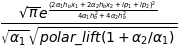

In [90]:
B = (sqrt(pi)*exp((2*alpha_1*h_b*x_1 + 2*alpha_2*h_b*x_2 + I*p_1 + I*p_2)**2/(4*alpha_1*h_b**2 + 4*alpha_2*h_b**2))/(sqrt(alpha_1)*sqrt(polar_lift(1 + alpha_2/alpha_1))))

B

This was then factored, in the hopes of clarification and simplification:

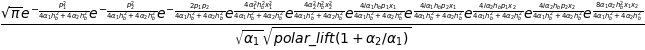

In [92]:
factor(B)

At this time, I am not too sure about the "polar_lift()" function shown, but it seems to be something from the sympy library. If this function is ignored, the denominator may be simplified as follows:

In [95]:
simplify(sqrt(alpha_1)*sqrt(1+(alpha_2)/alpha_1))

Which is *similar* to the solved integral found in the derivations.

There are also similarities in the exponents found in the "factor(B)" cell to that of which is listed in the derivations. However, it is unable to be simplified further by python. This is an area of interest to look into.

# 3. Transition Dipole Moment

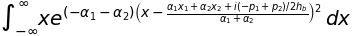

In [103]:
A = Integral(x*exp((-(alpha_1 + alpha_2)*(x - (alpha_2*x_2 +alpha_1*x_1 + (I*(p_2 - p_1))/(2*h_b))/(alpha_1 +alpha_2))**2)), (x, -oo, oo))

A

In [105]:
# A.doit()

Python is unable to compute the above integral. This is due (I believe) to the exp() term. 

I am not able to get an output at this time. (The cell runs indefinitely)

At this time, I am unable to solve this problem. 

# 4. Derivative Coupling

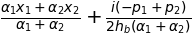

In [111]:
mu = (alpha_2*x_2 + alpha_1*x_1)/(alpha_1 + alpha_2) + I/(2*h_b)*(p_2 - p_1)/(alpha_1 + alpha_2)

mu

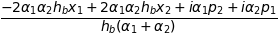

In [115]:
simplify(-2*alpha_2*mu + 2*alpha_2*x_2 + (I*p_2)/h_b)

This is equivalent to what is present in the derivations.